<a id='top'></a>

# Train Data Exploratory Data Analysis Exercise using pandas
Last updated: 18/01/2020

Click [here](#section4) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2) and [Data Sources](#section3) sections. Or you can click [here](#section6) to jump straight to the Conclusion.

## Introduction
This notebook is a short Exploratory Data Analysis (EDA) of train data using [pandas](http://pandas.pydata.org/) DataFrames and [Seaborn](https://seaborn.pydata.org/) visualisations.

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/train).

## Notebook Contents
1.    [Notebook Dependencies](#section1)<br>
2.    [Project brief](#section2)<br>
      2.1.  [Background Information](#section2.1)<br>
      2.2.  [Exercise](#section2.2)<br>
      2.3.  [Journey Example](#section2.3)<br>
3.    [Data Sources](#section2)<br>
4.    [Exploratory Data Analysis (EDA)](#section4)<br>
5.    [Summary](#section5)<br>
6.    [Bibliography](#section6)<br>

<a id='section1'></a>

## 1. Notebook Dependencies

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [Jupyter notebooks](https://jupyter.org/) for this interactive computational environment that the project is presented,
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion, and
*    [Seaborn](https://seaborn.pydata.org/) for data visualisation, and

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

In [1]:
# Import modules

# Python ≥3.5 (ideally)
import sys
assert sys.version_info >= (3, 5)

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np

# Data Preprocessing
import pandas as pd
import os    #  used to get CSV filenames
import re
import random

# Reading Multiple CSV
import glob    #  used to read multiple CSVs to create one single DataFrame

# Plotting figures
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # not include with Conda, 'pip install missingno' in the terminal if you don't have it

# Display in Jupyter
from IPython.core.display import HTML
from IPython.display import Image, YouTubeVideo

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


<a id='section2'></a>

## 2. Project Brief
The following brief has been copied and pasted from the provided HTML document and can be accessed [here](./README.html). I have included this brief in this Jupyter notebook for reference. Click [here](#section3) to skip to the next section where the proper coding begins. 

<a id='section2.1'></a>

### 2.1. Background Information
>In this investigation we aim to explore some train movement data to infer some features of the dataset. Our ultimate goal will be to find the date at which the timetable changed the public routes that it commonly ran.
>*    The data has been provided to us in `csv` format. This data contains
>     +    The schedule of the network
>     +    The actual time a train arrived at a station
>*    Note that if a train has missed its scheduled run, the actual times will all appear as `NA`.

<a id='section2.2'></a>

### 2.2. Exercise
>*    Load the data
>*    Add a date column to the data set
>     +    The best way to do this will be by preserving the file name
>     +    In this case, an acceptable, though slightly less desirably solution is to extract the date from an appropriate timestamp
>*    Identify a table showing how many of each journey are run per day
>     +    See below for an example of a journey
>     +    Ideally the table would have column headings `date`, `origin_station`, `destination_station` and `count`
>*    Subset the table such that it contains the 16 most common journeys per date
>     +    There is some context here which is worth some thought, but it will be ignored for now
>*    Identify the day that the timetable was changed via a suitably convincing visualisation

<a id='section2.3'></a>

### 2.3. Journey Example
>The following 19 stops make up one journey.
>*   Sugar Wave, the first station is the origin stop
>*   Attempt Pin, the last station is the destination stop
>*   The journey is defined by the origin and destination stops, and not by the complete set of stations between the endpoints
>     +    In practice, a journey would be defined by the complete set of journeys between the endpoints
>     +    For this exercise, however, the definition is simplified

In [2]:
# Initialize list of lists, data_ex 
data_ex = [[1, 'Sugar Wave', 'Attempt Pin', 'Sugar Wave', '01/08/15 05:09:00', '01/08/15 05:09:00', np.NaN],
        [2, 'Sugar Wave', 'Attempt Pin', 'Sky Weight', '01/08/15 05:09:00', '01/08/15 05:11:00', '01/08/15 05:10:30'],
        [3, 'Sugar Wave', 'Attempt Pin', 'Join Kick', '01/08/15 05:09:00', '01/08/15 05:13:00', '01/08/15 05:12:30'],
        [4, 'Sugar Wave', 'Attempt Pin', 'Pickle Wind', '01/08/15 05:09:00', '01/08/15 05:15:00', '01/08/15 05:14:30'],
        [5, 'Sugar Wave', 'Attempt Pin', 'Pear Push', '01/08/15 05:09:00', '01/08/15 05:18:00', '01/08/15 05:17:30'],
        [6, 'Sugar Wave', 'Attempt Pin', 'Maid Society', '01/08/15 05:09:00', '01/08/15 05:21:00', '01/08/15 05:20:30'],
        [7, 'Sugar Wave', 'Attempt Pin', 'Glove Attraction', '01/08/15 05:09:00', '01/08/15 05:23:00', '01/08/15 05:22:30'],
        [8, 'Sugar Wave', 'Attempt Pin', 'Division Sock', '01/08/15 05:09:00', '01/08/15 05:25:00', '01/08/15 05:24:30'],
        [9, 'Sugar Wave', 'Attempt Pin', 'Stone Wave', '01/08/15 05:09:00', '01/08/15 05:27:00', '01/08/15 05:26:30'],
        [10, 'Sugar Wave', 'Attempt Pin', 'Cart Trees Turnback', '01/08/15 05:09:00', '01/08/15 05:30:00', '01/08/15 05:29:30'],
        [11, 'Sugar Wave', 'Attempt Pin', 'Cat Cheese', '01/08/15 05:09:00', '01/08/15 05:30:00', '01/08/15 05:30:30'],
        [12, 'Sugar Wave', 'Attempt Pin', 'Digestion Lake', '01/08/15 05:09:00', '01/08/15 05:32:00', '01/08/15 05:31:30'],
        [13, 'Sugar Wave', 'Attempt Pin', 'Bushes Bag', '01/08/15 05:09:00', '01/08/15 05:34:00', '01/08/15 05:33:30'],
        [14, 'Sugar Wave', 'Attempt Pin', 'Cracker Knowledge', '01/08/15 05:09:00', '01/08/15 05:36:00', '01/08/15 05:35:30'],
        [15, 'Sugar Wave', 'Attempt Pin', 'Bat Event', '01/08/15 05:09:00', '01/08/15 05:38:00', '01/08/15 05:37:30'],
        [16, 'Sugar Wave', 'Attempt Pin', 'Arm Hate', '01/08/15 05:09:00', '01/08/15 05:41:00', '01/08/15 05:40:30'],
        [17, 'Sugar Wave', 'Attempt Pin', 'Army Letter Turnback', '01/08/15 05:09:00', '01/08/15 05:40:30', '01/08/15 05:41:30'],
        [18, 'Sugar Wave', 'Attempt Pin', 'Arithmetic Pleasure', '01/08/15 05:09:00', '01/08/15 05:43:00', '01/08/15 05:42:30'],
        [19, 'Sugar Wave', 'Attempt Pin', 'Attempt Pin', '01/08/15 05:09:00', np.NaN, '01/08/15 05:45:00']] 
  
# Create the pandas DataFrame from data_ex, df_ex
df_ex = pd.DataFrame(data_ex, columns = ['ID', 'Origin', 'Destination', 'Station', 'Start Time', 'Scheduled Departure', 'Scheduled Arrival']) 

# Set ID attribute as DataFrame index
df_ex.set_index('ID',inplace=True)

# View DataFrame, df_ex
df_ex

,Origin,Destination,Station,Start Time,Scheduled Departure,Scheduled Arrival
ID,,,,,,
1,Sugar Wave,Attempt Pin,Sugar Wave,01/08/15 05:09:00,01/08/15 05:09:00,NaN
2,Sugar Wave,Attempt Pin,Sky Weight,01/08/15 05:09:00,01/08/15 05:11:00,01/08/15 05:10:30
3,Sugar Wave,Attempt Pin,Join Kick,01/08/15 05:09:00,01/08/15 05:13:00,01/08/15 05:12:30
4,Sugar Wave,Attempt Pin,Pickle Wind,01/08/15 05:09:00,01/08/15 05:15:00,01/08/15 05:14:30
5,Sugar Wave,Attempt Pin,Pear Push,01/08/15 05:09:00,01/08/15 05:18:00,01/08/15 05:17:30
6,Sugar Wave,Attempt Pin,Maid Society,01/08/15 05:09:00,01/08/15 05:21:00,01/08/15 05:20:30
7,Sugar Wave,Attempt Pin,Glove Attraction,01/08/15 05:09:00,01/08/15 05:23:00,01/08/15 05:22:30
8,Sugar Wave,Attempt Pin,Division Sock,01/08/15 05:09:00,01/08/15 05:25:00,01/08/15 05:24:30
9,Sugar Wave,Attempt Pin,Stone Wave,01/08/15 05:09:00,01/08/15 05:27:00,01/08/15 05:26:30


<a id='section3'></a>

## 3. Data Source

<a id='section3.1'></a>

### 3.1. Introduction
We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook in the form a DataFrame.

<a id='section3.2'></a>

### 3.2. Creating the DataFrame
The dataset has nineteen features (columns) with the following definitions and data types:

| Variable     | Data type    | Definition     |
|------|-----|-----|
| `origin_station_code`    | object     | a...     |
| `origin_station`    | object     | a...     |
| `destination_station_code`    | object     | a...     |
| `destination_station`    | object     | a...     |
| `route_code`    | int64     | a...     |
| `start_time`    | object     | a...     |
| `end_time`    | object     | a...     |
| `fleet_number`    | float64     | a...     |
| `station_code`    | object     | a...     |
| `station`    | object     | a...     |
| `station_type`    | object     | a...     |
| `platform`    | object     | a...     |
| `sch_arr_time`    | object     | a...     |
| `sch_dep_time`    | object     | a...     |
| `act_arr_time`    | object     | a...     |
| `act_dep_time`    | object     | a...     |

<a id='section3.3'></a>

### 3.3. Creating the DataFrame
The data has come in 61 individual CSV files. The first task is to combine these individual `csv` files to form one DataFrame. These can be done using the glob function that we have imported in the [Notebook Dependencies](#section1) section (Section 1).

In [3]:
# Combine individual csv files to form one DataFrame, df_raw, using glob
dataDir = r'data/'
all_files = glob.glob(dataDir + "/*.csv")    # Creates a list of all csv files

li = []    # pd.concat takes a list of DataFrames as an argument

for filename in all_files:
    df_raw_temp = pd.read_csv(filename, index_col=None, header=0)
    df_raw_temp['filename'] = os.path.basename(filename)    # df_raw_temp['filename'] creates a new column named filename and os.dataDir.basename() turns a path like /a/d/c.txt into the filename c.txt
    li.append(df_raw_temp)

df_raw = pd.concat(li, axis=0, ignore_index=True)    # ignore_index=True as we don't want pandas to try an align row indexes

In [4]:
df_raw

,origin_station_code,origin_station,destination_station_code,destination_station,route_code,start_time,end_time,fleet_number,station_code,station,station_type,platform,sch_arr_time,sch_dep_time,act_arr_time,act_dep_time,filename
0,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,MAM,Machine Mist,Passenger,Outbound,NaN,26/09/15 05:01:00,NaN,26/09/15 05:01:10,2015-09-26.csv
1,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,BUB,Bucket Believe,Passenger,Outbound,26/09/15 05:01:30,26/09/15 05:02:00,26/09/15 05:02:13,26/09/15 05:02:38,2015-09-26.csv
2,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,MOM,Monkey Machine,Passenger,Outbound,26/09/15 05:04:30,26/09/15 05:05:00,26/09/15 05:04:41,26/09/15 05:05:09,2015-09-26.csv
3,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,FAF,Father Form,Passenger,Outbound,26/09/15 05:07:30,26/09/15 05:08:00,26/09/15 05:06:46,26/09/15 05:07:28,2015-09-26.csv
4,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,GIS,Giraffe Spot,Passenger,Outbound,26/09/15 05:09:30,26/09/15 05:10:00,26/09/15 05:08:43,26/09/15 05:09:40,2015-09-26.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487158,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,POW,Point Word,Passenger,Inbound,03/09/15 19:45:30,03/09/15 19:46:00,03/09/15 19:45:52,03/09/15 19:46:22,2015-09-03.csv
1487159,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,GAR,Gate Run,Passenger,Inbound,03/09/15 19:47:30,03/09/15 19:48:00,03/09/15 19:47:14,03/09/15 19:47:39,2015-09-03.csv
1487160,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,BIC,Bird Chance,Passenger,Inbound,03/09/15 19:49:30,03/09/15 19:50:00,03/09/15 19:48:57,03/09/15 19:49:37,2015-09-03.csv
1487161,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,CHH,Change Chairs,Passenger,Inbound,03/09/15 19:51:30,03/09/15 19:52:00,03/09/15 19:50:53,03/09/15 19:51:16,2015-09-03.csv


Next let's remove the '.csv' substring from the `filename` attribute

In [5]:
# Rename 'filename' attribute to 'date'
df_raw.rename(columns={'filename': 'date'}, inplace=True)

# Remove the '.csv' substring from the filename attribute
df_raw.replace(regex=['.csv'], value='', inplace=True)

### 3.4. Initial Data Handling
Let's quality of the dataset by looking first and last rows, using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [6]:
# Display the first 5 rows of the raw DataFrame, df_raw
df_raw.head()

,origin_station_code,origin_station,destination_station_code,destination_station,route_code,start_time,end_time,fleet_number,station_code,station,station_type,platform,sch_arr_time,sch_dep_time,act_arr_time,act_dep_time,date
0,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,MAM,Machine Mist,Passenger,Outbound,NaN,26/09/15 05:01:00,NaN,26/09/15 05:01:10,2015-09-26
1,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,BUB,Bucket Believe,Passenger,Outbound,26/09/15 05:01:30,26/09/15 05:02:00,26/09/15 05:02:13,26/09/15 05:02:38,2015-09-26
2,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,MOM,Monkey Machine,Passenger,Outbound,26/09/15 05:04:30,26/09/15 05:05:00,26/09/15 05:04:41,26/09/15 05:05:09,2015-09-26
3,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,FAF,Father Form,Passenger,Outbound,26/09/15 05:07:30,26/09/15 05:08:00,26/09/15 05:06:46,26/09/15 05:07:28,2015-09-26
4,MAM,Machine Mist,ROT,Roll Test,4,26/09/15 05:01:00,26/09/15 05:41:00,3088.0,GIS,Giraffe Spot,Passenger,Outbound,26/09/15 05:09:30,26/09/15 05:10:00,26/09/15 05:08:43,26/09/15 05:09:40,2015-09-26


In [7]:
# Display the last 5 rows of the raw DataFrame, df_raw
df_raw.tail()

,origin_station_code,origin_station,destination_station_code,destination_station,route_code,start_time,end_time,fleet_number,station_code,station,station_type,platform,sch_arr_time,sch_dep_time,act_arr_time,act_dep_time,date
1487158,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,POW,Point Word,Passenger,Inbound,03/09/15 19:45:30,03/09/15 19:46:00,03/09/15 19:45:52,03/09/15 19:46:22,2015-09-03
1487159,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,GAR,Gate Run,Passenger,Inbound,03/09/15 19:47:30,03/09/15 19:48:00,03/09/15 19:47:14,03/09/15 19:47:39,2015-09-03
1487160,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,BIC,Bird Chance,Passenger,Inbound,03/09/15 19:49:30,03/09/15 19:50:00,03/09/15 19:48:57,03/09/15 19:49:37,2015-09-03
1487161,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,CHH,Change Chairs,Passenger,Inbound,03/09/15 19:51:30,03/09/15 19:52:00,03/09/15 19:50:53,03/09/15 19:51:16,2015-09-03
1487162,BRB,Bridge Bottle,ANA,Ants Attempt,91,03/09/15 19:36:00,03/09/15 19:53:00,3024.0,ANA,Ants Attempt,Passenger,Inbound,03/09/15 19:53:00,NaN,03/09/15 19:52:07,NaN,2015-09-03


In [8]:
# Print the shape of the raw DataFrame, df_raw
print(df_raw.shape)

(1487163, 17)


The raw DataFrame has:
*    1,487,162 observations (rows), each observation represents one train movement between two stations, and
*    17 attributes (columns).

In [9]:
# Features (column names) of the raw DataFrame, df_raw
df_raw.columns

Index(['origin_station_code', 'origin_station', 'destination_station_code',
       'destination_station', 'route_code', 'start_time', 'end_time',
       'fleet_number', 'station_code', 'station', 'station_type', 'platform',
       'sch_arr_time', 'sch_dep_time', 'act_arr_time', 'act_dep_time', 'date'],
      dtype='object')

The dataset has nineteen features (columns):
*    `origin_station_code`: ...
*    `origin_station`: ...
*    `destination_station_code`: ... 
*    `destination_station`: ... 
*    `route_code`: ...
*    `start_time`: ...
*    `end_time`: ...
*    `fleet_number`: ... 
*    `station_code`: ...
*    `station`: ...
*    `station_type`: ...
*    `platform`: ...
*    `sch_arr_time`: ...
*    `sch_dep_time`: ...
*    `act_arr_time`: ...
*    `act_dep_time`: ...
*    `filename`: ...

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [10]:
# dtypes of the features of the raw DataFrame, df_raw
df_raw.dtypes

origin_station_code          object
origin_station               object
destination_station_code     object
destination_station          object
route_code                    int64
start_time                   object
end_time                     object
fleet_number                float64
station_code                 object
station                      object
station_type                 object
platform                     object
sch_arr_time                 object
sch_dep_time                 object
act_arr_time                 object
act_dep_time                 object
date                         object
dtype: object

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [11]:
# Info for the raw DataFrame, df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487163 entries, 0 to 1487162
Data columns (total 17 columns):
origin_station_code         1487163 non-null object
origin_station              1487163 non-null object
destination_station_code    1487163 non-null object
destination_station         1487163 non-null object
route_code                  1487163 non-null int64
start_time                  1487163 non-null object
end_time                    1487163 non-null object
fleet_number                1414798 non-null float64
station_code                1487163 non-null object
station                     1487163 non-null object
station_type                1487163 non-null object
platform                    1487163 non-null object
sch_arr_time                1398683 non-null object
sch_dep_time                1398683 non-null object
act_arr_time                1225622 non-null object
act_dep_time                1233333 non-null object
date                        1487163 non-null object
dty

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [12]:
# Description of the raw DataFrame, df_raw, showing some summary statistics for each numberical column in the DataFrame
df_raw.describe()

,route_code,fleet_number
count,1.487163e+06,1.414798e+06
mean,3.697101e+01,3.056247e+03
std,2.801699e+01,2.965374e+01
min,1.000000e+00,3.001000e+03
25%,1.000000e+01,3.031000e+03
50%,3.100000e+01,3.061000e+03
75%,6.800000e+01,3.082000e+03
max,9.300000e+01,3.103000e+03


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

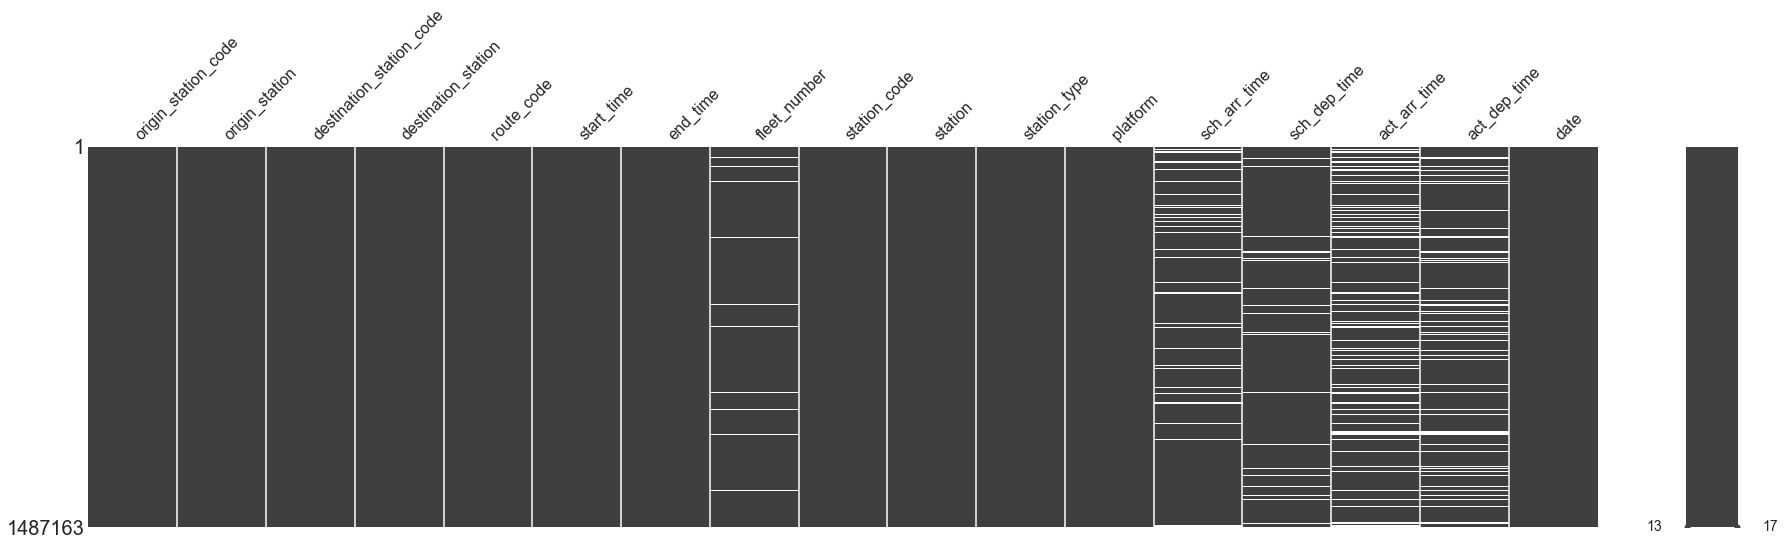

In [13]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_raw
msno.matrix(df_raw, figsize = (30, 7))

In [14]:
# Counts of missing values
null_value_stats = df_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

fleet_number     72365
sch_arr_time     88480
sch_dep_time     88480
act_arr_time    261541
act_dep_time    253830
dtype: int64

The visualisation shows us very quickly that there is a large number of mssing values in the `fleet_number`, `sch_arr_time`, `sch_dep_time`, `act_arr_time`, and `act_dep_time` attributes, 72,365, 88,480, 88,480, 261,541, and 253,830 respectively (determined by the [isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) counts).

These five attributes will need to be cleaned and preprocessed.

Let's export the merged DataFrame as a CSV file using the [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method, so that this data can be accessed by others outside a Jupyter notebook who may not be able to merge the data e.g. if you wanted to plot this data in Excel.

In [15]:
df_raw.to_csv(dataDir + "/combined/df_raw.csv")

<a id='section3.5'></a>

### 3.5. Data Wrangling
...

In [17]:
# Concatanate origin to destination as journey name
df_raw['complete_route_name'] = df_raw['origin_station'] + " to " + df_raw['destination_station']

In [19]:
# View all unique routes
df_raw['complete_route_name'].unique().tolist()

['Machine Mist to Roll Test',
 'Roll Test to Attempt Pin',
 'Attempt Pin to Roll Test',
 'Attempt Pin to Sugar Wave',
 'Step Scarecrow Turnback to Jail Vest',
 'Jail Vest to Children Cast Turnback',
 'Children Cast Turnback to Jail Vest',
 'Jail Vest to Step Scarecrow Turnback',
 'Roll Test to Skate Stone Turnback',
 'Skate Stone Turnback to Sugar Wave',
 'Children Cast Turnback to Step Scarecrow Turnback',
 'Roll Test to Machine Mist',
 'Step Scarecrow Turnback to Bridge Bottle',
 'Bridge Bottle to Crib Team',
 'Crib Team to Bridge Bottle',
 'Bridge Bottle to Step Scarecrow Turnback',
 'Step Scarecrow Turnback to Skate Stone Turnback',
 'Skate Stone Turnback to Spiders Toothbrush',
 'Squirrel Fan Turnback to Suit Treatment Turnback',
 'Suit Treatment Turnback to Spiders Toothbrush',
 'Suit Treatment Turnback to Step Scarecrow Turnback',
 'Sugar Wave to Attempt Pin',
 'Step Scarecrow Turnback to Children Cast Turnback',
 'Children Cast Turnback to Dad Pickle',
 'Dad Pickle to Level Let

In [20]:
# Count the number of unique routes
print(len(df_raw['complete_route_name'].unique()))

81


We can see that there are a total of 81 unique routes.

Now we have created a pandas DataFrame of the full dataset, `df_raw`, we next need to wrangle the data as per the [Project brief](#section2) (Section 2), to a form that's more suited to our needs. We need to take the existing DataFrame of train data, `df_raw`, and use the [groupby](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) and [aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) methods to create a new DataFrame, `df_grouped`, that shows how many of trains of each journey are run per day. This new table needs to have the column headings `date`, `origin_station`, `destination_station` and `count`.

The code for this is as follows:

In [21]:
# Created groupedby DataFrame, by date and journey_full
df_grouped = df_raw.groupby(
   ['date', 'complete_route_name']
).agg(
    {
         'start_time': 'nunique'    # count the unique start_times to identify each journey
    }
).reset_index()    # reset index to get grouped columns back

# Rename columns
df_grouped.columns = ['Date', 'Route Name', 'Count']

# View new DataFrame, df_grouped
df_grouped

,Date,Route Name,Count
0,2015-08-01,Attempt Pin to Roll Test,92
1,2015-08-01,Attempt Pin to Skin Shape,1
2,2015-08-01,Attempt Pin to Sugar Wave,6
3,2015-08-01,Bridge Bottle to Ants Attempt,5
4,2015-08-01,Bridge Bottle to Skate Stone Turnback,143
...,...,...,...
2834,2015-09-30,Sugar Wave to Skate Stone Turnback,2
2835,2015-09-30,Sugar Wave to Suit Treatment Turnback,1
2836,2015-09-30,Suit Treatment Turnback to Spiders Toothbrush,89
2837,2015-09-30,Suit Treatment Turnback to Step Scarecrow Turn...,2


Let's export the merged DataFrame as a CSV file as `df_grouped.csv`.

In [22]:
df_grouped.to_csv(dataDir + "/combined/df_grouped.csv")

Now we have created a pandas DataFrame and wrangled the data to meet our needs, we'll next conduct and Exploratory Data Analysis (EDA) 16 most common journeys per date.

<a id='section4'></a>

## 4. Exploratory Data Analysis (EDA)
We'll be using [Seaborn](https://seaborn.pydata.org/) for some basic plotting.

<a id='section6'></a>

## 5. Summary

This notebooks aims to demonstrate what is it to conduct an EDA with a new set of data using [pandas](http://pandas.pydata.org/) to create DataFrames, clean, wrangle the data, and [Seaborn](https://seaborn.pydata.org/) to plot the data.

<a id='section6'></a>

## 6. Bibliography

*    
*    
*    
*    
*    

[Back to the top](#top)